In [1]:
import pandas as pd
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [345]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};\
                            SERVER=sql1944-fm1-in.amr.corp.intel.com,3181;\
                            DATABASE=GSMDW_TST;\
                            Trusted_Connection=yes;\
                            integrated security=true')

query= "select A.*,CASE WHEN A.TotalChange > 0 THEN 1 ELSE 0 END AS POChg,CASE WHEN YEAR(convert(date,A.RDD)) <> 9999 AND A.LeadTimeDays > 0 AND dateadd(day,A.LeadTimeDays,convert(date,A.POCreate)) > convert(date,A.RDD) THEN 'Y' ELSE 'UNK' END as POPlacedLate from (select OTD.*,CASE WHEN YEAR(convert(date,OTD.GoodsLastReceipt)) = 9999 then null WHEN YEAR(convert(date,OTD.RDD)) = 9999 then datediff (day,convert(date,OTD.SDD),convert(date,OTD.GoodsLastReceipt)) else datediff(day,convert(date,OTD.RDD),convert(date,OTD.GoodsLastReceipt)) END as DaysLate, CASE WHEN OTD IS NULL THEN 0 WHEN OTD = 1 THEN 1 END AS OTDStatus from [gsmdw_tst].[JUSTIN].[KPI_OTD] OTD) A WHERE A.DaysLate is not null and A.Org is not null"
df = pd.read_sql(query, sql_conn)
sql_conn.close()

In [257]:
df

,PONbr,POLineNbr,GoodsLastReceipt,RDD,TotalChange,BuyerName,Plant,PaymentTerm,OTD,SupplierID,...,plnt_nm,plnt_id,mtrl_id,itm_dsc,LeadTimeDays,DaysLate,OTDStatus,POChg,POPlacedLate,POSeries
0,7001427470,00010,8/13/2018,12/31/9999,0,"Kumaraguru, Hemana",PG,X,1,1000013915,...,Bayan Lepas-Campus C,PG,000000000500029786,"SVC,REPAIR MOTOR/ENCODER/GEAR,MAXON",0.0,-8,1,0,UNK,70
1,7001293377,00020,11/30/2017,12/31/9999,0,"Liang, Yong Teng",SS,N,1,1000011910,...,Saigon HTP-Campus CC,SS,000000000500349942,SOLENOID VALVE,0.0,-62,1,0,UNK,70
2,7001293960,00010,12/10/2017,12/31/9999,0,"Kumaraguru, Hemana",SS,DT,1,1000016431,...,Saigon HTP-Campus CC,SS,000000000500322966,PEDESTAL SERVICE KIT FOR AR2 CGM TCU,0.0,-4,1,0,UNK,70
3,7001417694,00010,7/27/2018,12/31/9999,0,"MORALES, MONICA M",CH,DS,1,1000015580,...,Chandler-Campus CC10,CH,000000000500339379,"BLANK_COUPON,UNIVERSAL,18.5MMx26.5MMx0.>",0.0,0,1,0,UNK,70
4,7001286664,00020,11/4/2017,12/31/9999,0,"EVANS, TAYLOR",RA,J2,None,1000024101,...,Ronler Acres-Campus,RA,000000000500279694,SU3200 SPIN CHUCK W/SENSOR PFA-CF,0.0,4,0,0,UNK,70
5,7001402856,00030,7/22/2018,12/31/9999,0,"Kumaraguru, Hemana",SS,N,1,1000070514,...,Saigon HTP-Campus CC,SS,000000000500363765,"STHI, SHAFT, BOX PAN",0.0,-12,1,0,UNK,70
6,7001501002,00420,4/4/2019,12/31/9999,0,"Keatinge, Geoff",IR,Y,None,1000055819,...,Leixlip-Campus CC500,IR,000000000500097498,VERTICAL-COVER-B,0.0,79,0,0,UNK,70
7,7001395573,00010,6/14/2018,12/31/9999,2,"LEE, MING HUOY",SS,N,1,1000001066,...,Saigon HTP-Campus CC,SS,000000000500319732,KBL PCH H99495 12MIL BALL HEAD,0.0,-18,1,1,UNK,70
8,4200156810,00440,6/7/2018,5/19/2018,5,"Kim, James Jeong",IR,CZ,None,1000004874,...,Leixlip-Campus CC500,IR,000000000500355238,PUMP ASSY(AMCP-P-X11),74.0,19,0,1,UNK,42
9,4501763434,00010,8/1/2018,12/31/9999,0,Inbavalli Sandkerd,MYA9,Y,1,1000062639,...,Intel-CC100,MYA9,2000-170-299,SZAACCVAA,0.0,0,1,0,UNK,45


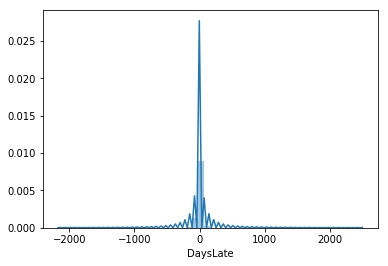

In [44]:
#sns.distplot(df['DaysLate'])
#sns.distplot(df[(df['Org'] == 'OFS')]['DaysLate'])
sns.distplot(df[(df['PONbr'].str[:2] != '30')]['DaysLate'])

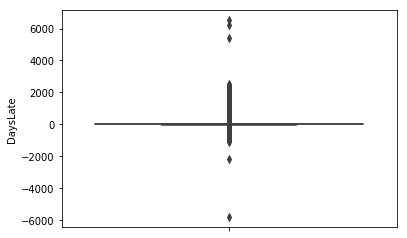

In [14]:
ax = sns.boxplot(y="DaysLate", data=df)
#ax = sns.boxplot(y="DaysLate", data=df[(df['Org'] == 'FAB')])
#ax = sns.swarmplot(y="DaysLate", data=df[(df['Org'] == 'OFS')])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A8605C8D0>,
      dtype=object)

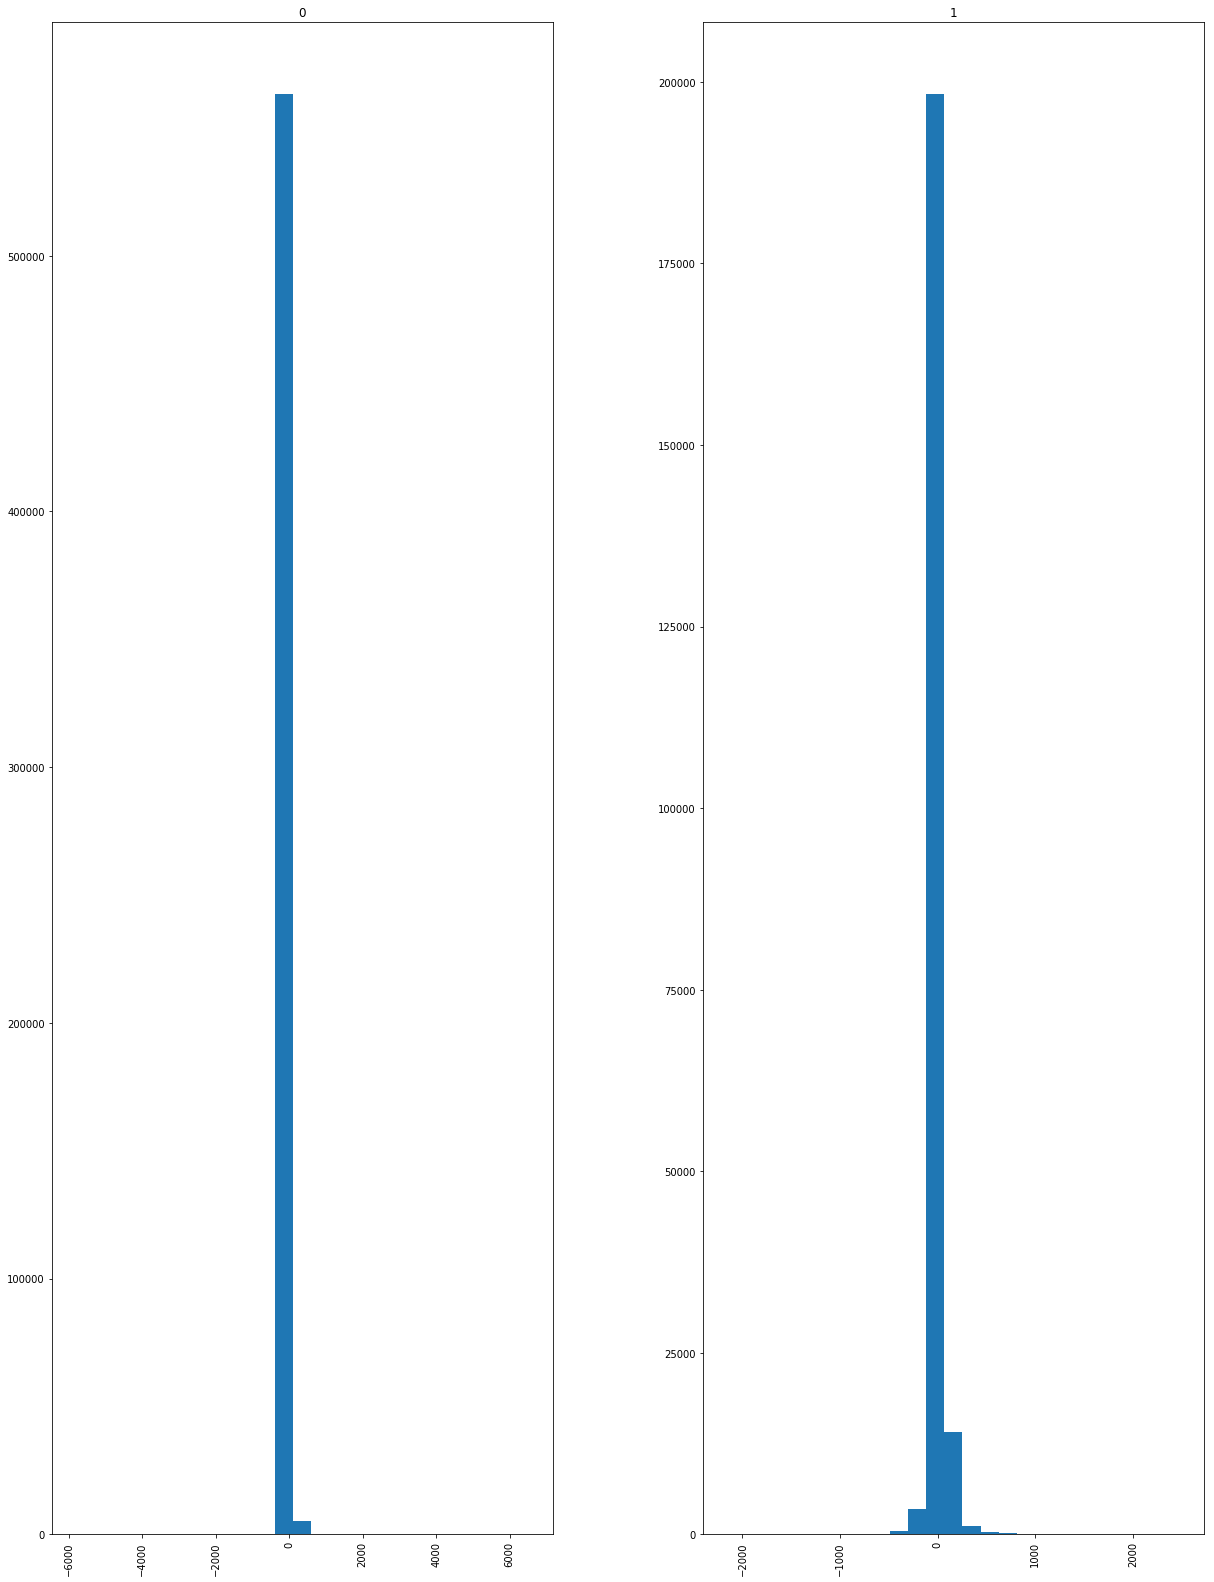

In [127]:
#df.hist(column='DaysLate', by='Org', bins=25, grid=False, figsize=(20,28))
df.hist(column='DaysLate', by='POChg', bins=25, grid=False, figsize=(20,28))

In [90]:
df.groupby('OTDStatus').count()

,PONbr,POLineNbr,GoodsLastReceipt,RDD,TotalChange,BuyerName,Plant,PaymentTerm,OTD,SupplierID,...,supl_mtrl_nbr,purch_doc_line_shrt_dsc,purch_line_net_usd_amt,mtrl_grp_cd,plnt_nm,plnt_id,mtrl_id,itm_dsc,DaysLate,POSeries
OTDStatus,,,,,,,,,,,,,,,,,,,,,
0,264731,264731,264731,264731,264731,264708,264731,264731,0,264731,...,264731,264731,264731,264731,264731,264731,264731,264731,264731,264731
1,522140,522140,522140,522140,522140,522113,522140,522140,522140,522140,...,522140,522140,522140,522140,522140,522140,522140,522140,522140,522140


Text(0, 0.5, 'Frequency of OTD')

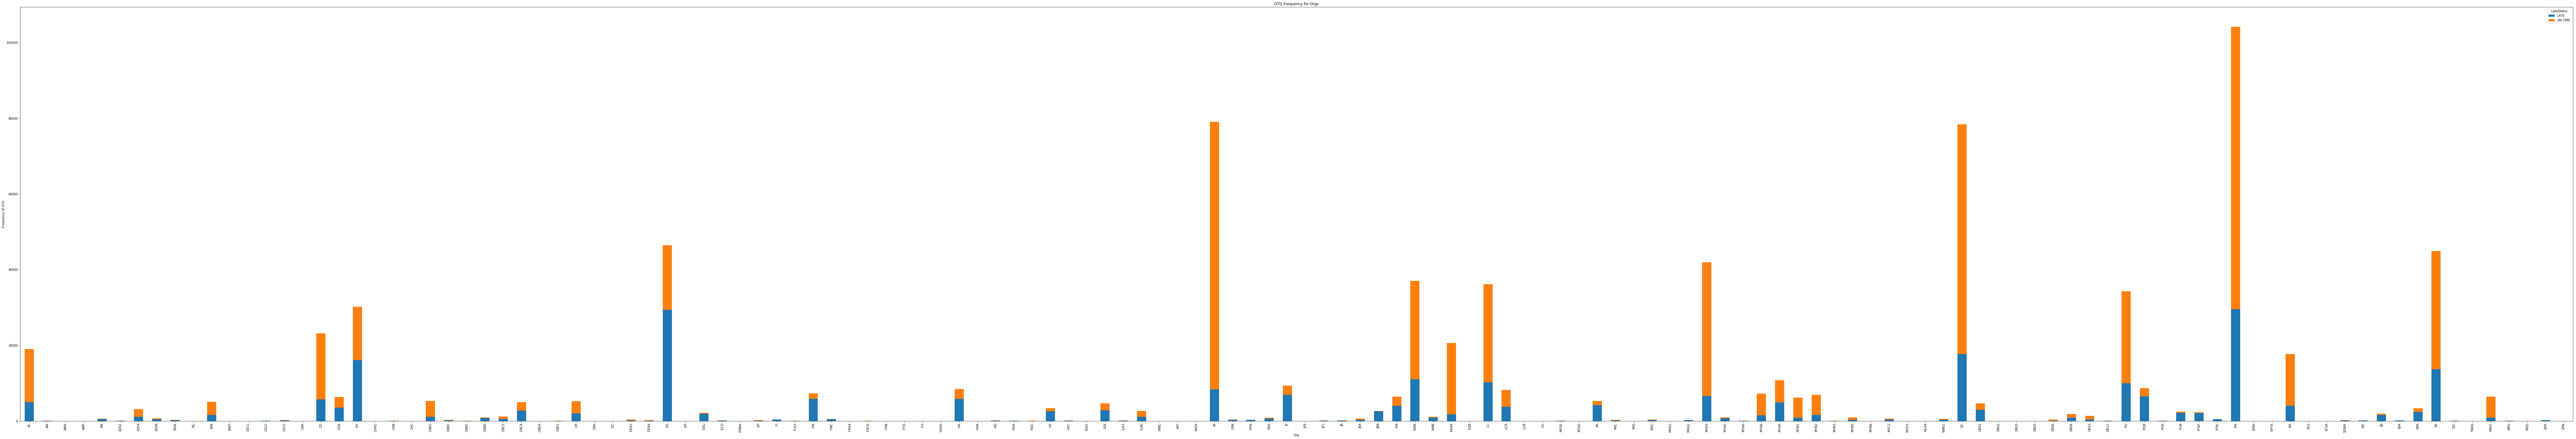

In [28]:
%matplotlib inline
pd.crosstab(df.Plant,df.LateStatus).plot(kind='bar',stacked=True,figsize=(150,25))
#pd.crosstab(df.Org,df.LateStatus).plot(kind='bar')
plt.title('OTD Frequency for Orgs')
plt.xlabel('Org')
plt.ylabel('Frequency of OTD')
#plt.savefig('purchase_fre_job')

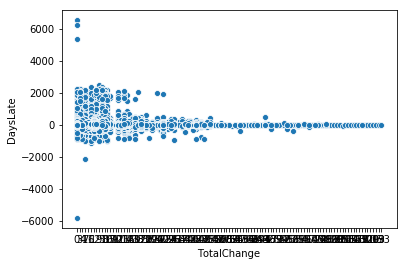

In [123]:
ax = sns.scatterplot(x="TotalChange", y="DaysLate", data=df)

In [119]:
#Specify columns to use for ML model
df2 = df
df2['POSeries'] = df2['PONbr'].str[:2]
df2 = df2[['OTDStatus','Org','Plant','POSeries']]
#df2 = df2.head(n=5000)

In [120]:
#update categoryical variables to "dummy" variables
cat_vars=['Org','Plant','POSeries']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df2=df2.join(cat_list)

#remove columns from dataframe that have been converted to dummies
data_vars=df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
df2 = df2[to_keep]

In [ ]:
#since "ON-TIME" is nearly double the count of "LATE" we need to up-sample "LATE"
X = df2.loc[:, df2.columns != 'OTDStatus']
y = df2.loc[:, df2.columns == 'OTDStatus']
from imblearn.over_sampling import SMOTE #conda install -c conda-forge imbalanced-learn
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['OTDStatus'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['OTDStatus']==0]))
print("Number of subscription",len(os_data_y[os_data_y['OTDStatus']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['OTDStatus']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['OTDStatus']==1])/len(os_data_X))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
# Recursive Feature Elimination
data_final_vars=df2.columns.values.tolist()
y=['OTDStatus']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs',max_iter=4000)
#logreg = LogisticRegression(solver='saga')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
bestColumns = dict(zip(X, rfe.ranking_))

[False False False False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False  True False False  True False
 False  True False False False False False False False False False False
 False False  True False False False False False False False False False
  True False False False False False False  True False False  True False
 False False False False  True  True False False False False False False
 False False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
  True False False False False False False False False False False False
  True False  True False False False  True]
[ 48  21   4  44  57  23  17  59  69  51  71  24  66   1  79   1  82  84
  86  8

In [101]:
bestColumnsFiltered = {k:v for (k,v) in bestColumns.items() if v<15}

In [110]:
finalColumns = []
for i in bestColumnsFiltered:
    finalColumns.append(i)
finalColumns

['Org_GFM',
 'Plant_BGA',
 'Plant_BW',
 'Plant_CD',
 'Plant_CDA',
 'Plant_CR',
 'Plant_ECO',
 'Plant_FI',
 'Plant_FMC',
 'Plant_HD',
 'Plant_HF',
 'Plant_HFC',
 'Plant_IGK',
 'Plant_ISW',
 'Plant_ITPA',
 'Plant_JFB',
 'Plant_JRB',
 'Plant_KMA',
 'Plant_KMB',
 'Plant_LCB',
 'Plant_LIL',
 'Plant_M036',
 'Plant_MID',
 'Plant_MYA5',
 'Plant_MYA9',
 'Plant_MYB1',
 'Plant_PGE',
 'Plant_PTKF',
 'Plant_PTKI',
 'Plant_SDWA',
 'Plant_ZPN',
 'POSeries_35',
 'POSeries_70']

In [117]:
X=os_data_X[finalColumns]
y=os_data_y['OTDStatus']

In [118]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.656657
         Iterations: 35
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.053     
Dependent Variable:    OTDStatus           AIC:                 6824.3175 
Date:                  2019-04-05 17:14    BIC:                 7040.3347 
No. Observations:      5146                Log-Likelihood:      -3379.2   
Df Model:              32                  LL-Null:             -3566.9   
Df Residuals:          5113                LLR p-value:         2.9765e-60
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
             Coef.     Std.Err.     z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------
Org_GFM       0.7395      1.2740  0.5805 0.5616       -1.7574   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [367]:
################## Start new linear regression model to predict # Days Late ########################
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [368]:
df2 = df
df2['POSeries'] = df2['PONbr'].str[:2]
df2 = df2[['Org','Plant','POSeries','PaymentTerm','SupplierID','mtrl_grp_cd','POChg','POPlacedLate','DaysLate']]

In [143]:
# This only works for ordinal data, but since there is no natural order to these variables we need to use "One hot encoding"
# https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# X['Org'] = label_encoder.fit_transform(X['Org'])
# X['Plant'] = label_encoder.fit_transform(X['Plant'])
# X['PaymentTerm'] = label_encoder.fit_transform(X['PaymentTerm'])

In [144]:
y = df2[['DaysLate']]
X = df2.drop('DaysLate', axis=1)
#X['TotalChange'] = X['TotalChange'].astype(int)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [146]:
#update categoryical variables to "dummy" variables using One hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_one_hot = enc.transform(X_train)
X_test_one_hot = enc.transform(X_test)

In [147]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train_one_hot, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
# Make predictions using the testing set
DaysLate_y_pred = regr.predict(X_train_one_hot)

In [149]:
# The coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

# The mean squared error
#print("Mean squared error: %.2f"
#      % mean_squared_error(y_test, DaysLate_y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, DaysLate_y_pred))

intercept = regr.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for Org is 13.26055997867835
The coefficient for Plant is -1.7605109275849358
The coefficient for POSeries is 26.762992349133462
The coefficient for PaymentTerm is 10.73103894062206
The coefficient for SupplierID is 11.872137041194456
The coefficient for mtrl_grp_cd is -1.4523666451296668
The coefficient for POChg is -13.249389805652463
The coefficient for POPlacedLate is 58.09650399758325
The intercept for our model is 1.1608859476243814


In [150]:
regr.score(X_test_one_hot, y_test)

0.2606933787850547

In [139]:
print (len(regr.coef_[0]))

5282


In [374]:
##################### Logistic Regression ###############################
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

from sklearn.utils import resample

In [372]:
dfLogReg = df
dfLogReg['POSeries'] = dfLogReg['PONbr'].str[:2]
#dfLogReg = dfLogReg[dfLogReg['POSeries']=='70']
dfLogReg = dfLogReg[['Org','Plant','POSeries','PaymentTerm','SupplierID','mtrl_grp_cd','POChg','POPlacedLate','OTDStatus']]

In [399]:
#since "ON-TIME" is nearly double the count of "LATE" we need to up-sample "LATE"

# Separate majority and minority classes
df_majority = dfLogReg[dfLogReg.OTDStatus==1]
df_minority = dfLogReg[dfLogReg.OTDStatus==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority.index),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
#df_upsampled.OTDStatus.value_counts()

1    538068
0    538068
Name: OTDStatus, dtype: int64

In [406]:
y = df_upsampled[['OTDStatus']]
X = df_upsampled.drop('OTDStatus', axis=1)

In [407]:
#update categoryical variables to "dummy" variables using One hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_one_hot = enc.transform(X)

#joblib.dump(enc, "encoder.pkl")
#enc = joblib.load("encoder.pkl")

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=1)

In [409]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [410]:
predictions = logisticRegr.predict(X_test)

In [411]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7998147694995369


In [412]:
predictions = pd.DataFrame([{'Org':'AT','Plant':'PG','POSeries':'70','PaymentTerm':'X','SupplierID':'1000013915','mtrl_grp_cd':'95990051','POChg':0,'POPlacedLate':'UNK'}])

#X_hotEncoded = enc.transform(predictions)

predEncoded = enc.transform(predictions)

logisticRegr.predict(predEncoded)#[0]

array([0], dtype=int64)

In [285]:
Testdf = df[df['OTDStatus']== 1]
Testdf = Testdf[['Org','Plant','POSeries','PaymentTerm','SupplierID','mtrl_grp_cd','POChg','POPlacedLate']]

In [417]:
################# Random Forest Classification #############################
from sklearn.ensemble import RandomForestClassifier

In [418]:
dfRForest = df
dfRForest['POSeries'] = dfRForest['PONbr'].str[:2]
#dfRForest = dfRForest[dfRForest['POSeries']=='70']
dfRForest = dfRForest[['Org','Plant','POSeries','PaymentTerm','SupplierID','mtrl_grp_cd','POChg','POPlacedLate','OTDStatus']]

In [419]:
#since "ON-TIME" is nearly double the count of "LATE" we need to up-sample "LATE"

# Separate majority and minority classes
df_majority = dfRForest[dfRForest.OTDStatus==1]
df_minority = dfRForest[dfRForest.OTDStatus==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority.index),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
#df_upsampled.OTDStatus.value_counts()

In [428]:
y = df_upsampled[['OTDStatus']]
X = df_upsampled.drop('OTDStatus', axis=1)

In [429]:
#update categoryical variables to "dummy" variables using One hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_one_hot = enc.transform(X)

#joblib.dump(enc, "encoder.pkl")
#enc = joblib.load("encoder.pkl")

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=1)

In [431]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [432]:
preds = clf.predict(X_test)

In [433]:
#Returns the mean accuracy on the given test data and labels
clf.score(X_test, y_test)

0.827156402067891